# FlowKit Tutorial

https://flowkit.readthedocs.io/en/latest/?badge=latest

## Classes

* Sample
* Matrix
* GatingStrategy
* Session

## Sub-modules

* gates
* transforms

## Requirements

* flowio
* flowutils
* matplotlib
* scipy
* seaborn
* pandas
* numpy
* lxml
* bokeh
* anytree
* networkx
* graphviz (optional, for saving gating hierarchies as images)

## References

*Bagwell CB. Hyperlog-a flexible log-like transform for negative, zero,
and positive valued data. Cytometry A., 2005:64(1):34–42.*

*Parks DR, Roederer M, Moore WA. A new “Logicle” display method avoids deceptive effects of logarithmic scaling for low signals and compensated data. Cytometry., 2006:69: 541-545*

*Moller T, Haines E. Ray/Polygon Intersection, Real-Time Rendering (3rd Edition), 2008*

*http://geomalgorithms.com/a03-_inclusion.html*


## Let's get started...

In [1]:
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt

import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

plt.ioff()

Loading BokehJS ...

### Most classes and methods have been documented: 

In [2]:
help(fk.Sample)

Help on class Sample in module flowkit._models.sample:

class Sample(builtins.object)
 |  Sample(fcs_path_or_data, channel_labels=None, compensation=None, null_channel_list=None, ignore_offset_error=False, cache_original_events=False)
 |  
 |  Represents a single FCS sample from an FCS file, NumPy array or Pandas
 |  DataFrame.
 |  
 |  Note:
 |      Some FCS files incorrectly report the location of the last data byte
 |      as the last byte exclusive of the data section rather than the last
 |      byte inclusive of the data section. Technically, these are invalid
 |      FCS files but these are not corrupted data files. To attempt to read
 |      in these files, set the `ignore_offset_error` option to True.
 |  
 |  :param fcs_path_or_data: FCS data, can be either:
 |  
 |      - a file path or file handle to an FCS file
 |      - a pathlib Path object
 |      - a FlowIO FlowData object
 |      - a NumPy array of FCS event data (must provide channel_labels)
 |      - a Pandas DataFr

## Sample

A Sample object can conveniently be created in multiple ways:
    
    * A file path to an FCS file
    * A pathlib Path object to an FCS file
    * An already instantiated FlowIO FlowData object 
    * A NumPy array (provided the channel_labels argument is given)
    * A Pandas DataFrame (with channel labels as headers)

When creating a Sample instance, several optional arguments are available, including specifying a compensation matrix and declaring null channels. The `channel_labels` argument is used (and required) if loading data from a NumPy array. Below, we create a Sample instance via a file path to an FCS file:

In [3]:
fcs_path = '../examples/data/gate_ref/data1.fcs'

In [4]:
sample = fk.Sample(fcs_path)

In [5]:
sample

Sample(v2.0, B07, 8 channels, 13367 events)

### Sub-sampling a Sample for performance

FlowKit is optimized (or attempts to be!) for performance. However, when dealing with high-dimensional flow cytometry data or with data containing millions of events, it can be useful to sub-sample events to speed up processing. FlowKit sub-samples events randomly, but in a reproducible way. You can be guaranteed the same sub-sample indices when re-running analysis. Further, sub-sampling does not delete any events, the sub-sampled indices are simply stored to use as a subset of events. Any Sample class method that processes or retrieves events will have a `subsample` argument that takes a Boolean value specifying whether to use the sub-sampled events or all events.

Next, we will sub-sample our FCS data to 10,000 events, statistically giving us the capability of resolving rare cell subsets to 0.01%. We can retrieve the subsampled indices using the `subsample_indices` attribute.

In [6]:
sample.subsample_events(subsample_count=10000)

In [7]:
sample.subsample_indices

array([ 4136, 12180, 11048, ...,  9661, 10709, 10093])

### FCS Metadata and Channel Information

#### Get the FCS version of the file (returns None if a Sample was created from a NumPy array or Pandas DataFrame)

In [8]:
sample.version

2.0

#### Retrieve all the FCS metadata:

In [9]:
sample.get_metadata()

{'byteord': '4,3,2,1',
 'datatype': 'I',
 'nextdata': '0',
 'sys': 'Macintosh System Software 9.0.4',
 'creator': 'CELLQuestª 3.3',
 'tot': '13367',
 'mode': 'L',
 'par': '8',
 'p1n': 'FSC-H',
 'p1r': '1024',
 'p1b': '16',
 'p1e': '0,0',
 'p1g': '3.67',
 'p2n': 'SSC-H',
 'p2r': '1024',
 'p2b': '16',
 'p2e': '0,0',
 'p2g': '8',
 'p3n': 'FL1-H',
 'p3r': '1024',
 'p3b': '16',
 'p3e': '4,0',
 'p4n': 'FL2-H',
 'p4r': '1024',
 'p4b': '16',
 'p4e': '4,0',
 'p5n': 'FL3-H',
 'p5r': '1024',
 'p5b': '16',
 'p5e': '4,0',
 'p1s': 'FSC-Height',
 'p2s': 'SSC-Height',
 'p3s': 'CD4 FITC',
 'p4s': 'CD8 B PE',
 'p5s': 'CD3 PerCP',
 'p6n': 'FL2-A',
 'p6r': '1024',
 'p6b': '16',
 'p6e': '0,0',
 'timeticks': '100',
 'p7n': 'FL4-H',
 'p7r': '1024',
 'p7e': '4,0',
 'p7b': '16',
 'p7s': 'CD8 APC',
 'p8n': 'Time',
 'p8r': '1024',
 'p8e': '0,0',
 'p8b': '16',
 'p8s': 'Time (102.40 sec.)',
 'sample id': 'Default Patient ID',
 'src': 'Default',
 'case number': 'Default Case Number',
 'cyt': 'FACSCalibur',
 'cytnum

#### Retrieve a dictionary of the required PnN labels & optional PnS labels for each channel. Note that Samples distinguish between channel numbers and indices, with channel numbers being indexed at 1 and channel indices being indexed at 0. The `channels` attribute yields the labels with keys as the channel numbers:

In [10]:
sample.channels

{'1': {'PnN': 'FSC-H', 'PnS': 'FSC-Height'},
 '2': {'PnN': 'SSC-H', 'PnS': 'SSC-Height'},
 '3': {'PnN': 'FL1-H', 'PnS': 'CD4 FITC'},
 '4': {'PnN': 'FL2-H', 'PnS': 'CD8 B PE'},
 '5': {'PnN': 'FL3-H', 'PnS': 'CD3 PerCP'},
 '6': {'PnN': 'FL2-A'},
 '7': {'PnN': 'FL4-H', 'PnS': 'CD8 APC'},
 '8': {'PnN': 'Time', 'PnS': 'Time (102.40 sec.)'}}

#### Get a list of only the PnN labels:

In [11]:
sample.pnn_labels

['FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL2-A', 'FL4-H', 'Time']

#### The optional PnS labels are available too (empty values will be empty strings):

In [12]:
sample.pns_labels

['FSC-Height',
 'SSC-Height',
 'CD4 FITC',
 'CD8 B PE',
 'CD3 PerCP',
 '',
 'CD8 APC',
 'Time (102.40 sec.)']

#### A Sample knows which indices belong to fluorescent channels:

In [13]:
sample.fluoro_indices

[2, 3, 4, 5, 6]

#### Lookup a channel index by a label string:

In [14]:
sample.get_channel_index('FL2-H')

3

#### Or, lookup a channel number:

In [15]:
sample.get_channel_number_by_label('FL2-H')

4

#### And, just so you don't have to write any lookup code, you can get a channel index via its number:

In [16]:
sample.get_channel_index(4)

3

#### To get the event count:

In [17]:
sample.event_count

13367

#### Several other Sample attributes are available including: 

* `acquisition_date`
* `original_filename`
* `subsample_indices`
* `anomolous_indices`
* `compensation`

### Plotting Sample Events

* Histogram
* Contour Plot
* Interactive Scatter Plot
* Interactive Scatter Plot Matrix

For all plotting methods, the `source` argument determines whether the original events ('raw'), compensated events ('comp'), or transformed events ('xform') are displayed. Note, transformed events will be displayed post-compensation if a compensation matrix was supplied when creating a Sample instance or if the `apply_compensation` method has been called. Transformations can be applied to a non-compensated Sample.

All plotting methods return a figure of either a Seaborn or Bokeh instance. This is done so the caller can modify and/or display the plot as required.

### Histogram

In [18]:
help(sample.plot_histogram)

Help on method plot_histogram in module flowkit._models.sample:

plot_histogram(channel_label_or_number, source='xform', subsample=False, bins=None) method of flowkit._models.sample.Sample instance
    Returns a histogram plot of the specified channel events, available
    as raw, compensated, or transformed data. Plot also contains a curve
    of the gaussian kernel density estimate.
    
    :param channel_label_or_number:  A channel's PnN label or number to use
        for plotting the histogram
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param bins: Number of bins to use for the histogram. If None, the
        number of bins is determined by the Freedman-Diaconis rule.
    :return: Matplotlib figure of the hist

In [19]:
p = sample.plot_histogram('FSC-H', source='raw')
show(p)

#### Changing the bin size:

In [20]:
p = sample.plot_histogram('FSC-H', source='raw', bins=256)
show(p)

### Contour Plot

In [21]:
help(sample.plot_contour)

Help on method plot_contour in module flowkit._models.sample:

plot_contour(x_label_or_number, y_label_or_number, source='xform', subsample=False, plot_contour=True, plot_events=False, x_min=None, x_max=None, y_min=None, y_max=None, fig_size=(8, 8)) method of flowkit._models.sample.Sample instance
    Returns a contour plot of the specified channel events, available
    as raw, compensated, or transformed data.
    
    :param x_label_or_number:  A channel's PnN label or number for x-axis
        data
    :param y_label_or_number: A channel's PnN label or number for y-axis
        data
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param plot_contour: Whether to display the contour lines. Default is True.
    :param p

In [22]:
# plot using only the sub-sampled events for performance
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw', subsample=True)

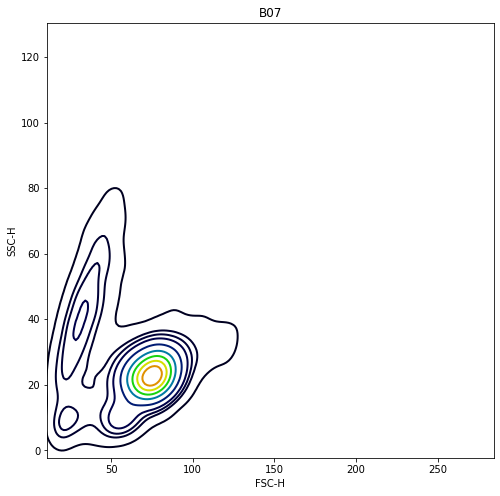

In [23]:
plt.show()

#### Adding events for a non-interactive scatter plot (but not as fast as the true scatter plot method):

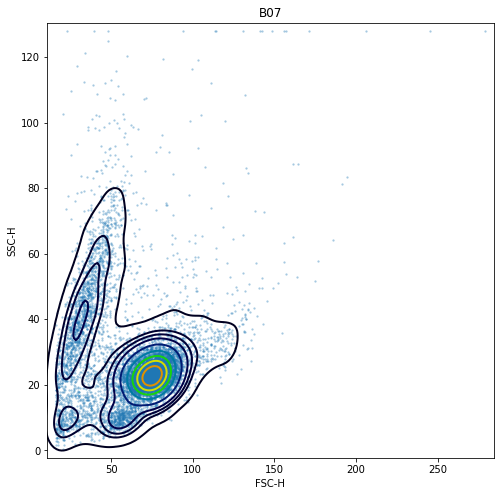

In [24]:
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw', plot_events=True, subsample=True)
plt.show()

### Interactive Scatter Plot

The plot_scatter method uses Bokeh and is much faster, though you may still want to plot as a sub-sample for some larger FCS files

In [25]:
p = sample.plot_scatter('FSC-H', 'SSC-H', source='raw')

In [26]:
show(p)

#### Turn off the color density:

In [27]:
p = sample.plot_scatter('FSC-H', 'SSC-H', source='raw', color_density=False)
show(p)

#### Apply a transform and plot fluorescent channels (raw and transformed):

In [28]:
xform = fk.transforms.AsinhTransform('asinh', param_t=10000, param_m=4.5, param_a=0)
sample.apply_transform(xform)

In [29]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='raw')
show(p)

In [30]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='xform')
show(p)

### Interactive Scatterplot Matrix

In [31]:
help(sample.plot_scatter_matrix)

Help on method plot_scatter_matrix in module flowkit._models.sample:

plot_scatter_matrix(source='xform', subsample=False, channel_labels_or_numbers=None, color_density=False, plot_height=256, plot_width=256) method of flowkit._models.sample.Sample instance
    Returns an interactive scatter plot matrix for all channel combinations
    except for the Time channel.
    
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param channel_labels_or_numbers: List of channel PnN labels or channel
        numbers to use for the scatter plot matrix. If None, then all
        channels will be plotted (except Time).
    :param color_density: Whether to color the events by density, similar
        to a heat map. Default is False.
    

In [32]:
# For the scatter matrix, sub-sampling is usually a good idea since there are so many plots
spm = sample.plot_scatter_matrix(
    source='xform', 
    channel_labels_or_numbers=['FSC-H', 'SSC-H', 'FL3-H', 'FL4-H'],
    color_density=True,
    subsample=True
)
show(spm)

## GatingStrategy

A GatingStrategy object is created from a valid GatingML document. The interface is simple as there is a single method `gate_sample` that takes a Sample instance and an optional `gate_id` text string identifying a gate. If no `gate_id` is specified the method evaluates and returns all gates in the gating strategy.

In [33]:
help(fk.GatingStrategy)

Help on class GatingStrategy in module flowkit._models.gating_strategy:

class GatingStrategy(builtins.object)
 |  Represents a flow cytometry gating strategy, including instructions
 |  for compensation and transformation.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_comp_matrix(self, matrix)
 |      Add a compensation matrix to the gating strategy, see `transforms` module. The matrix ID must be unique in the
 |      gating strategy.
 |      
 |      :param matrix: an instance of the Matrix class
 |      :return: None
 |  
 |  add_gate(self, gate, gate_path=None)
 |      Add a gate to the gating strategy, see `gates` module. The gate ID and gate path must be
 |      unique in the gating strategy. A gate with a unique gate ID and parent can be added without
 |      specifying a gate_path. However, if the gate's ID and parent combination alread

In [34]:
gml_path = '../examples/data/gate_ref/gml/gml_all_gates.xml'

In [35]:
g_strat = fk.parse_gating_xml(gml_path)

In [36]:
g_strat

GatingStrategy(51 gates, 9 transforms, 1 compensations)

#### Retrieve all the gates (with their gate paths)

In [37]:
g_strat.get_gate_ids()

[('Range1', ('root',)),
 ('ParAnd3', ('root', 'Range1')),
 ('Rectangle1', ('root',)),
 ('Rectangle2', ('root',)),
 ('Range2', ('root',)),
 ('RatRange1', ('root',)),
 ('RatRange2', ('root',)),
 ('RatRange1a', ('root',)),
 ('Rectangle3', ('root',)),
 ('Rectangle4', ('root',)),
 ('Rectangle5', ('root',)),
 ('ScaleRange1', ('root',)),
 ('ScaleRange2', ('root',)),
 ('ScaleRange3', ('root',)),
 ('ScaleRange4', ('root',)),
 ('ScaleRange5', ('root',)),
 ('ScaleRange6', ('root',)),
 ('ScaleRange1c', ('root',)),
 ('ScaleRange2c', ('root',)),
 ('ScaleRange3c', ('root',)),
 ('ScaleRange4c', ('root',)),
 ('ScaleRange5c', ('root',)),
 ('ScaleRect1', ('root',)),
 ('ScalePar1', ('root', 'ScaleRect1')),
 ('ScaleRange6c', ('root',)),
 ('ScaleRange7c', ('root',)),
 ('ScaleRange8c', ('root',)),
 ('Polygon1', ('root',)),
 ('ParAnd2', ('root', 'Polygon1')),
 ('Polygon2', ('root',)),
 ('Polygon3NS', ('root',)),
 ('Polygon4', ('root',)),
 ('Ellipse1', ('root',)),
 ('Quadrant1', ('root',)),
 ('FL2P-FL4P', ('ro

In [38]:
g_strat.get_gate('Range1')

GMLRectangleGate(Range1, parent: None, dims: 1)

#### Retrieve all the compensation matrices

In [39]:
g_strat.comp_matrices

{'MySpill': Matrix(MySpill, dims: 3)}

#### And, all the transformations

In [40]:
g_strat.transformations

{'FL2Rat1': RatioGMLTransform(FL2Rat1, FL2-H / FL2-A, a: 1.0, b: 0.0, c: -1.0),
 'FL2Rat2': RatioGMLTransform(FL2Rat2, FL2-H / FL2-A, a: 2.7, b: -100.0, c: -300.0),
 'MyRatLog': LogGMLTransform(MyRatLog, t: 100.0, m: 2.0),
 'AsinH_10000_4_1': AsinhGMLTransform(AsinH_10000_4_1, t: 10000.0, m: 4.0, a: 1.0),
 'Hyperlog_10000_1_4.5_0': HyperlogGMLTransform(Hyperlog_10000_1_4.5_0, t: 10000.0, w: 1.0, m: 4.5, a: 0.0),
 'Linear_10000_500': LinearGMLTransform(Linear_10000_500, t: 10000.0, a: 500.0),
 'Logicle_10000_0.5_4.5_0': LogicleGMLTransform(Logicle_10000_0.5_4.5_0, t: 10000.0, w: 0.5, m: 4.5, a: 0.0),
 'Logicle_10000_1_4_0.5': LogicleGMLTransform(Logicle_10000_1_4_0.5, t: 10000.0, w: 1.0, m: 4.0, a: 0.5),
 'Logarithmic_10000_5': LogGMLTransform(Logarithmic_10000_5, t: 10000.0, m: 5.0)}

#### Visualize the gate hierarchy as ASCII text, JSON, dictionary, or an image

In [41]:
text = g_strat.get_gate_hierarchy('ascii')

In [42]:
print(text)

root
├── Range1
│   ╰── ParAnd3
├── Rectangle1
├── Rectangle2
├── Range2
├── RatRange1
├── RatRange2
├── RatRange1a
├── Rectangle3
├── Rectangle4
├── Rectangle5
├── ScaleRange1
├── ScaleRange2
├── ScaleRange3
├── ScaleRange4
├── ScaleRange5
├── ScaleRange6
├── ScaleRange1c
├── ScaleRange2c
├── ScaleRange3c
├── ScaleRange4c
├── ScaleRange5c
├── ScaleRect1
│   ╰── ScalePar1
├── ScaleRange6c
├── ScaleRange7c
├── ScaleRange8c
├── Polygon1
│   ╰── ParAnd2
├── Polygon2
├── Polygon3NS
├── Polygon4
├── Ellipse1
├── Quadrant1
│   ├── FL2P-FL4P
│   ├── FL2N-FL4P
│   ├── FL2N-FL4N
│   ╰── FL2P-FL4N
├── Quadrant2
│   ├── FSCN-SSCN
│   ├── FSCD-SSCN-FL1N
│   ├── FSCP-SSCN-FL1N
│   ├── FSCD-FL1P
│   ╰── FSCN-SSCP-FL1P
├── And1
├── And2
├── Or1
├── And3
├── Not1
├── And4
╰── Or2


In [43]:
gs_json = g_strat.get_gate_hierarchy('json')

In [44]:
print(gs_json)

{"name": "root", "children": [{"name": "Range1", "children": [{"name": "ParAnd3"}]}, {"name": "Rectangle1"}, {"name": "Rectangle2"}, {"name": "Range2"}, {"name": "RatRange1"}, {"name": "RatRange2"}, {"name": "RatRange1a"}, {"name": "Rectangle3"}, {"name": "Rectangle4"}, {"name": "Rectangle5"}, {"name": "ScaleRange1"}, {"name": "ScaleRange2"}, {"name": "ScaleRange3"}, {"name": "ScaleRange4"}, {"name": "ScaleRange5"}, {"name": "ScaleRange6"}, {"name": "ScaleRange1c"}, {"name": "ScaleRange2c"}, {"name": "ScaleRange3c"}, {"name": "ScaleRange4c"}, {"name": "ScaleRange5c"}, {"name": "ScaleRect1", "children": [{"name": "ScalePar1"}]}, {"name": "ScaleRange6c"}, {"name": "ScaleRange7c"}, {"name": "ScaleRange8c"}, {"name": "Polygon1", "children": [{"name": "ParAnd2"}]}, {"name": "Polygon2"}, {"name": "Polygon3NS"}, {"name": "Polygon4"}, {"name": "Ellipse1"}, {"name": "Quadrant1", "children": [{"name": "FL2P-FL4P"}, {"name": "FL2N-FL4P"}, {"name": "FL2N-FL4N"}, {"name": "FL2P-FL4N"}]}, {"name": "

In [45]:
gs_dict = g_strat.get_gate_hierarchy('dict')

In [46]:
gs_dict

{'name': 'root',
 'children': [{'gate': GMLRectangleGate(Range1, parent: None, dims: 1),
   'name': 'Range1',
   'children': [{'gate': GMLBooleanGate(ParAnd3, parent: Range1, type: and),
     'name': 'ParAnd3'}]},
  {'gate': GMLRectangleGate(Rectangle1, parent: None, dims: 2),
   'name': 'Rectangle1'},
  {'gate': GMLRectangleGate(Rectangle2, parent: None, dims: 2),
   'name': 'Rectangle2'},
  {'gate': GMLRectangleGate(Range2, parent: None, dims: 1), 'name': 'Range2'},
  {'gate': GMLRectangleGate(RatRange1, parent: None, dims: 1),
   'name': 'RatRange1'},
  {'gate': GMLRectangleGate(RatRange2, parent: None, dims: 1),
   'name': 'RatRange2'},
  {'gate': GMLRectangleGate(RatRange1a, parent: None, dims: 1),
   'name': 'RatRange1a'},
  {'gate': GMLRectangleGate(Rectangle3, parent: None, dims: 2),
   'name': 'Rectangle3'},
  {'gate': GMLRectangleGate(Rectangle4, parent: None, dims: 2),
   'name': 'Rectangle4'},
  {'gate': GMLRectangleGate(Rectangle5, parent: None, dims: 2),
   'name': 'Recta

#### Exporting the gate hierarchy as an image requires the `graphviz` package

In [47]:
g_strat.export_gate_hierarchy_image('gs.png')

In [48]:
img = plt.imread('gs.png')

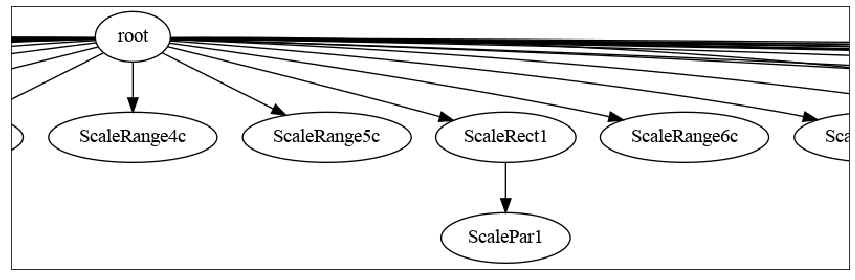

In [49]:
f = plt.figure(figsize=(16, 4))
ax = f.subplots(1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.imshow(img[:, 3100:3900], aspect='equal', interpolation='nearest')
plt.tight_layout()
plt.show()

#### Get results for a single sample

In [50]:
gs_results = g_strat.gate_sample(sample)

In [51]:
help(gs_results)

Help on GatingResults in module flowkit._models.gating_results object:

class GatingResults(builtins.object)
 |  GatingResults(results_dict, sample_id)
 |  
 |  A GatingResults instance is returned from the GatingStrategy `gate_samples` method
 |  as well as the Session `get_gating_results` method. End users will never create an
 |  instance of GatingResults directly, only via these GatingStrategy and Session
 |  methods. However, there are several GatingResults methods to retrieve the results.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, results_dict, sample_id)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_gate_absolute_percent(self, gate_id)
 |      Retrieve percent of events, relative to the total sample events, of the specified gate ID for the
 |      gating results sample
 |      
 |      :param gate_id: text string of a gate ID
 |      :return: floating point number of the absolute percent
 |  
 |  get_gate_count(self, gate_id)
 | 

In [52]:
gs_results.report

sample           gate_path         gate_id      gate_type quadrant_parent  \
40    B07             (root,)            And1    BooleanGate            None   
41    B07             (root,)            And2    BooleanGate            None   
43    B07             (root,)            And3    BooleanGate            None   
47    B07             (root,)            And4    BooleanGate            None   
29    B07             (root,)        Ellipse1  EllipsoidGate            None   
32    B07             (root,)       FL2N-FL4N   QuadrantGate       Quadrant1   
31    B07             (root,)       FL2N-FL4P   QuadrantGate       Quadrant1   
33    B07             (root,)       FL2P-FL4N   QuadrantGate       Quadrant1   
30    B07             (root,)       FL2P-FL4P   QuadrantGate       Quadrant1   
37    B07             (root,)       FSCD-FL1P   QuadrantGate       Quadrant2   
35    B07             (root,)  FSCD-SSCN-FL1N   QuadrantGate       Quadrant2   
34    B07             (root,)       FSCN-SSCN   QuadrantGate       Quadrant2   
38    B07             (root,)  FSCN-SSCP-FL1P   QuadrantGate       Quadrant2   
36    B07             (root,)  FSCP-SSCN-FL1N   QuadrantGate       Quadrant2   
44    B07             (root,)            Not1    BooleanGate            None   
42    B07             (root,)             Or1    BooleanGate            None   
48    B07             (root,)             Or2    BooleanGate            None   
25    B07             (root,)        Polygon1    PolygonGate            None   
26    B07             (root,)        Polygon2    PolygonGate            None   
27    B07             (root,)      Polygon3NS    PolygonGate            None   
28    B07             (root,)        Polygon4    PolygonGate            None   
0     B07             (root,)          Range1  RectangleGate            None   
3     B07             (root,)          Range2  RectangleGate            None   
4     B07             (root,)       RatRange1  RectangleGate            None   
6     B07             (root,)      RatRange1a  RectangleGate            None   
5     B07             (root,)       RatRange2  RectangleGate            None   
1     B07             (root,)      Rectangle1  RectangleGate            None   
2     B07             (root,)      Rectangle2  RectangleGate            None   
7     B07             (root,)      Rectangle3  RectangleGate            None   
8     B07             (root,)      Rectangle4  RectangleGate            None   
9     B07             (root,)      Rectangle5  RectangleGate            None   
10    B07             (root,)     ScaleRange1  RectangleGate            None   
16    B07             (root,)    ScaleRange1c  RectangleGate            None   
11    B07             (root,)     ScaleRange2  RectangleGate            None   
17    B07             (root,)    ScaleRange2c  RectangleGate            None   
12    B07             (root,)     ScaleRange3  RectangleGate            None   
18    B07             (root,)    ScaleRange3c  RectangleGate            None   
13    B07             (root,)     ScaleRange4  RectangleGate            None   
19    B07             (root,)    ScaleRange4c  RectangleGate            None   
14    B07             (root,)     ScaleRange5  RectangleGate            None   
20    B07             (root,)    ScaleRange5c  RectangleGate            None   
15    B07             (root,)     ScaleRange6  RectangleGate            None   
22    B07             (root,)    ScaleRange6c  RectangleGate            None   
23    B07             (root,)    ScaleRange7c  RectangleGate            None   
24    B07             (root,)    ScaleRange8c  RectangleGate            None   
21    B07             (root,)      ScaleRect1  RectangleGate            None   
45    B07    (root, Polygon1)         ParAnd2    BooleanGate            None   
46    B07      (root, Range1)         ParAnd3    BooleanGate            None   
39    B07  (root, ScaleRect1)       ScalePar1  RectangleGate            None   

  

### Get gate membership for a specific gate as a boolean array

In [53]:
and1_gate_membership = gs_results.get_gate_indices('And1')

In [54]:
and1_gate_membership

array([False, False, False, ..., False, False, False])

In [55]:
and1_gate_membership.sum()

561